# Power analysis

In [1]:
import os
import sys

sys.path.append('../')
from utils import settings
from utils.helper import ensure_list

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from itertools import product

In [2]:
%config InlineBackend.figure_format='retina'

new_rc_params = {
    "text.usetex": False,
    "svg.fonttype": 'none',
    "font.size": 7,
}
plt.rcParams.update(new_rc_params)

In [3]:
N_SNPS = settings.RUNTIME_N_SNPS

def load_results(model, ncells, ndonors, ntested, func='mean'):
    f = f'../results/runtime/model~{model}_ncells~{ncells}_ndonors~{ndonors}_ntested~{ntested}_runtime.txt'
    df = pd.read_csv(f, index_col=0, header=None) 
    df /= N_SNPS
    if func == 'median':
        return df.median().item()
    else:
        return df.mean().item()

def create_df(model, ncells, ndonors, ntested, func='median'):
    df = pd.DataFrame(columns=['model', 'ncells', 'ndonors', 'ntested', 'runtime'])
    for i, v in enumerate(product(model, ncells, ndonors, ntested)):
        r = pd.DataFrame(dict(zip(['model', 'ncells', 'ndonors', 'ntested', 'runtime'], v)), index=[i])
        r[['runtime']] = load_results(*v, func=func)
        df = pd.concat([df, r])
    df['Model'] = df['model'].replace(model_names)
    return df

In [4]:
model_names = settings.MODEL_TITLE_NAMES
model_colors = settings.MODEL_COLORS

### Plot

In [5]:
model=['cellregmap', 'cellregmap-association']
ncells=[settings.RUNTIME_N_CELLS_DEFAULT]
ndonors=settings.RUNTIME_N_DONORS
ntested=[settings.NUM_TESTED_DEFAULT]

df = create_df(model=model, ncells=ncells, ndonors=ndonors, ntested=ntested)

In [6]:
x = 'ndonors'
xlabel = 'Number of individuals'
ticks = [50, 100, 150]
xmin = 45
xmax = 160
textpos = 100

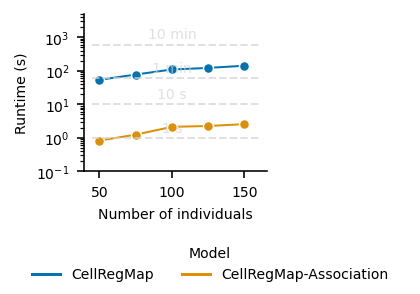

In [7]:
g = sns.relplot(
    x=x, y='runtime', linewidth=1, markersize=5, 
    hue='Model', height=2, aspect=1.1, data=df, 
    marker='o', kind='line', palette=model_colors)
ax = g.fig.axes[0]

for i, l in zip([1, 10, 60, 600], ['1 s', '10 s', '1 min', '10 min']):
    ax.plot([xmin, xmax], [i, i], c='lightgrey', linestyle='--', alpha=0.7, linewidth=1)
    ax.text(textpos, 1.5*i, l, ha='center', c='lightgrey', alpha=0.7)

ax.set(
    yscale='log',
    xlabel=xlabel,
    ylabel='Runtime (s)',
    ylim=[0.1, 5000])

ax.set_xticks(ticks)
ax.set_xticklabels(ticks)

g.fig.subplots_adjust(bottom=.4)
sns.move_legend(g, loc='lower center', ncol=3)
plt.savefig("figures/runtime_ndonors.svg", dpi=300)

In [8]:
model=['cellregmap', 'cellregmap-association']
ncells=settings.RUNTIME_N_CELLS
ndonors=[settings.RUNTIME_N_DONORS_DEFAULT]
ntested=[settings.NUM_TESTED_DEFAULT]

df = create_df(model=model, ncells=ncells, ndonors=ndonors, ntested=ntested)

In [9]:
x = 'ncells'
xlabel = 'Number of cells'
ticks = np.asarray([5000, 10000, 15000])
xmin = 4500
xmax = 16000
textpos = 10000

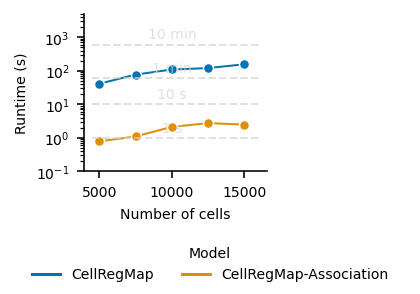

In [10]:
g = sns.relplot(
    x=x, y='runtime', linewidth=1, markersize=5, 
    hue='Model', height=2, aspect=1.1, data=df, 
    marker='o', kind='line', palette=model_colors)
ax = g.fig.axes[0]

for i, l in zip([1, 10, 60, 600], ['1 s', '10 s', '1 min', '10 min']):
    ax.plot([xmin, xmax], [i, i], c='lightgrey', linestyle='--', alpha=0.7, linewidth=1)
    ax.text(textpos, 1.5*i, l, ha='center', c='lightgrey', alpha=0.7)

ax.set(
    yscale='log',
    xlabel=xlabel,
    ylabel='Runtime (s)',
    ylim=[0.1, 5000])

ax.set_xticks(ticks)
ax.set_xticklabels(ticks)

g.fig.subplots_adjust(bottom=.4)
sns.move_legend(g, loc='lower center', ncol=3)
plt.savefig("figures/runtime_ncells.svg", dpi=300)

In [11]:
model=['cellregmap', 'cellregmap-association']
ncells=[settings.RUNTIME_N_CELLS_DEFAULT]
ndonors=[settings.RUNTIME_N_DONORS_DEFAULT]
ntested=settings.NUM_TESTED

df = create_df(model=model, ncells=ncells, ndonors=ndonors, ntested=ntested)

In [12]:
x = 'ntested'
xlabel = 'Number of tested contexts'
ticks = [2, 5, 10, 15, 20]
xmin = 1
xmax = 22
textpos = 10

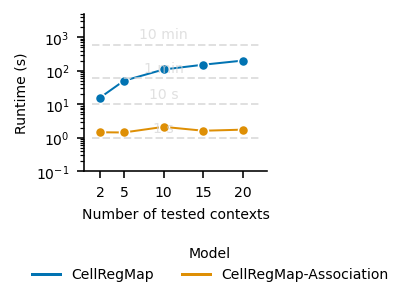

In [13]:
g = sns.relplot(
    x=x, y='runtime', linewidth=1, markersize=5, 
    hue='Model', height=2, aspect=1.1, data=df, 
    marker='o', kind='line', palette=model_colors)
ax = g.fig.axes[0]

for i, l in zip([1, 10, 60, 600], ['1 s', '10 s', '1 min', '10 min']):
    ax.plot([xmin, xmax], [i, i], c='lightgrey', linestyle='--', alpha=0.7, linewidth=1)
    ax.text(textpos, 1.5*i, l, ha='center', c='lightgrey', alpha=0.7)

ax.set(
    yscale='log',
    xlabel=xlabel,
    ylabel='Runtime (s)',
    ylim=[0.1, 5000])

ax.set_xticks(ticks)
ax.set_xticklabels(ticks)

g.fig.subplots_adjust(bottom=.4)
sns.move_legend(g, loc='lower center', ncol=3)
plt.savefig("figures/runtime_ntested.svg", dpi=300)